## 格式转换 

In [62]:
import format
source_path = r'D:\zhangxin\Course\data\standard\pdf'
store_path = r'D:\zhangxin\Course\data\standard\txt'
format.transform_to_txt(source_path, store_path)

NameError: name 'PDFDocument' is not defined

## 标准点提取 

In [3]:
import extractCourse
source_path = r'D:\zhangxin\Course\data\standard\txt'
store_path = r'D:\zhangxin\Course\data\standard\point'
extractCourse.extract_point(source_path, store_path)

## 标准分词 

In [7]:
import jiebaCut as jc
sourcePath = r'D:\zhangxin\Course\data\standard\point'
dicPath = r'D:\zhangxin\Course\user\my中文和符号1960.txt'
storePath = r'D:\zhangxin\Course\data\cut\cutResultSta.csv'
jc.cut(sourcePath, dicPath, 'single', storePath, 'one', 'csv')

## 导入语料库 

In [8]:
import csv
import pandas as pd
from pandas import DataFrame
import numpy as np
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
from gensim.models import KeyedVectors

In [4]:
szTXcorpus = r"D:\zhangxin\Course\user\500000-small.txt"  # 小语料库
wv = KeyedVectors.load_word2vec_format(szTXcorpus, binary=False)

## 整理分词结果，删去不在语料库中的词语 

In [24]:
sourcePath = r'D:\zhangxin\Course\data\cut\cutResultSta.csv'
file = csv.reader(open(sourcePath, 'r', encoding='utf-8'))
standardWords = []
for line in file:
    flag = False
    temp = []
    for word in line:
        if word is not '':
            if flag:
                try:
                    vector = wv[word]
                    temp.append(word)
                except:
                    print(word)
                    continue
            else:
                temp.append(word)
                flag = True
        else:
            continue
    standardWords.append(temp)

如求
插入排序
可维护性
堆排序
二叉
搜索算法
图论
邻接矩阵


In [25]:
storePath = r'D:\zhangxin\Course\data\cut\cutResultStaUseful.csv'
dfWords = pd.DataFrame(data=standardWords)
dfWords.to_csv(storePath, index=False, header=False, encoding='utf-8')

## 课程标准相似度计算 

In [41]:
sourcePath = r'D:\zhangxin\Course\data\tencent\cutResultUseful.csv'
file = csv.reader(open(sourcePath, 'r', encoding='utf-8'))
courseNameList = []
courseWords = []
for line in file:
    flag = False
    temp = []
    for word in line:
        if word is not '':
            if flag:
                temp.append(word)
            else:
                courseNameList.append(word)
                flag = True
        else:
            continue
    courseWords.append(temp)

In [46]:
def countDis(disDF, type=1):
    if type == 1:
        v0 = np.argmax(disDF, axis=1)
        v0 = disDF[range(disDF.shape[0]), v0]
        result = v0.sum() / len(v0)
    else:
        result = 0
    return result

In [43]:
sourcePath = r'D:\zhangxin\Course\data\cut\cutResultStaUseful.csv'
file = csv.reader(open(sourcePath, 'r', encoding='utf-8'))
standardNameList = []
standardWords = []
for line in file:
    flag = False
    temp = []
    for word in line:
        if word is not '':
            if flag:
                temp.append(word)
            else:
                standardNameList.append(word)
                flag = True
        else:
            continue
    standardWords.append(temp)

In [47]:
courseSimDF = pd.DataFrame(np.zeros((len(standardNameList), len(courseNameList))), index=standardNameList, columns= courseNameList)

In [48]:
for course1 in standardNameList:
    print(course1, standardNameList.index(course1))
    coursePos1 = standardNameList.index(course1)
    wordList1 = standardWords[coursePos1]
    words1len = len(wordList1)
    for course2 in courseNameList:
        coursePos2 = courseNameList.index(course2)
        wordList2 = courseWords[coursePos2]
        words2len = len(wordList2)
        # 课程间词之间的相似度矩阵
        wordsSim = np.zeros((words1len, words2len))
        for word1 in wordList1:
            word1Pos = wordList1.index(word1)
            for word2 in wordList2:
                word2Pos = wordList2.index(word2)
                # similarity = wordsAR[wordsUseful.index(word1)][wordsUseful.index(word2)]
                similarity = wv.similarity(word1, word2)
                wordsSim[word1Pos][word2Pos] = similarity
        # 计算课程间相似度
        distance = countDis(wordsSim, type=1)
        courseSimDF.iloc[standardNameList.index(course1)][coursePos2] = distance
#     print(courseSimDF.loc[course1,:])
    storePath = r'D:\zhangxin\Course\data\standard\courseSimSta.csv'
    courseSimDF.to_csv(storePath, header=True, index=True, encoding='utf-8')

基础数据结构及算法 0
上海师范大学 计算机科学与技术 C语言程序设计           0.628981
上海师范大学 计算机科学与技术 C语言课程实践           0.652130
上海师范大学 计算机科学与技术 UML与设计模式          0.651579
上海师范大学 计算机科学与技术 Web程序设计           0.580585
上海师范大学 计算机科学与技术 专业英语              0.595542
上海师范大学 计算机科学与技术 云计算与物联网           0.600596
上海师范大学 计算机科学与技术 信息学科竞赛教育          0.552374
上海师范大学 计算机科学与技术 信息安全基础            0.563612
上海师范大学 计算机科学与技术 复杂网络与社会计算概论       0.631932
上海师范大学 计算机科学与技术 多媒体技术             0.579524
上海师范大学 计算机科学与技术 嵌入式系统             0.602951
上海师范大学 计算机科学与技术 操作系统              0.610363
上海师范大学 计算机科学与技术 数字逻辑              0.587558
上海师范大学 计算机科学与技术 数字逻辑课程实践          0.588401
上海师范大学 计算机科学与技术 数据库系统概论           0.677638
上海师范大学 计算机科学与技术 数据库课程实践           0.579586
上海师范大学 计算机科学与技术 离散数学              0.640156
上海师范大学 计算机科学与技术 网络与通信             0.572816
上海师范大学 计算机科学与技术 计算机图形学            0.554822
上海师范大学 计算机科学与技术 软件工程              0.589984
上海师范大学 计算机科学与技术 软件类课程设计           0.599437
上海师范大学 计算机科学与技术 高级语言程序设计          0.698457
哈尔滨工程大学 计算机科学与技术  软件工程课程设计        0.608420

In [54]:
storePath = r'D:\zhangxin\Course\data\standard\courseSimSta.csv'
courseSimDF.to_csv(storePath, header=True, index=True, encoding='utf-8')

In [50]:
datas = courseSimDF.values.T

In [52]:
datasDF = pd.DataFrame(data = datas)
datasDF.describe()

,0,1
count,2676.000000,2676.000000
mean,0.607036,0.606396
std,0.044189,0.049379
min,0.460620,0.440251
25%,0.576472,0.572213
50%,0.604254,0.604586
75%,0.633542,0.634784
max,0.909250,0.918592


## 学校评分 

In [9]:
import pandas as pd
sourcePath = r'D:\zhangxin\Course\data\standard\courseSimSta.csv'
courseSimDF = pd.read_csv(sourcePath, header=0, index_col=0, encoding='utf-8')

In [72]:
import numpy as np
standardLst = courseSimDF.index
standardDF = pd.DataFrame(np.zeros((len(standardLst),2)),index=standardLst)
for item in standardLst:
    items = item.split()
    standardDF.loc[item,0] = items[1]
    standardDF.loc[item,1] = items[2]

In [56]:
courseLst = courseSimDF.columns
schoolSet = set()
for item in courseLst:
    items = item.split()
    schoolSet.add(items[0])

In [36]:
schoolJudgeDF = pd.DataFrame(np.zeros((len(standardLst),len(schoolSet))), index=standardLst, columns=schoolSet)

In [80]:
for school in schoolSet:
    course = []
    for item in courseLst:
        items=item.split()
        if items[0] == school:
            course.append(item)
    tempDF = pd.DataFrame(np.zeros((len(standardLst),len(course))), index=standardLst, columns=course)
    for sta in standardLst:
        for cou in course:
            tempDF.loc[sta,cou] = courseSimDF.loc[sta,cou]
    tempAr = tempDF.values
    v1 = np.argmax(tempAr, axis=1)
    v1 = tempAr[range(tempAr.shape[0]), v1]
    for pos in range(len(v1)):
        schoolJudgeDF.ix[pos,school] = v1[pos] * float(standardDF.iloc[pos,1])
print(schoolJudgeDF.describe())

C:\Users\wiseben\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


             安徽大学      曲阜师范大学      上海师范大学        西南大学        潍坊学院      湖北理工学院  \
count  103.000000  103.000000  103.000000  103.000000  103.000000  103.000000   
mean     2.327184    2.213324    2.021243    2.203790    2.146529    2.087917   
std      1.970878    1.833772    1.688372    1.832264    1.788137    1.757787   
min      0.724419    0.678376    0.649896    0.697119    0.660602    0.658036   
25%      0.841202    0.817459    0.721795    0.812750    0.801151    0.758291   
50%      1.609907    1.543572    1.407254    1.542117    1.494331    1.458831   
75%      2.584169    2.472916    2.243106    2.401295    2.364615    2.267069   
max     10.154349    9.137285    8.298147    9.244156    8.909268    9.071328   

          哈尔滨工程大学      沈阳工业大学      广东海洋大学        广州大学      西南石油大学  
count  103.000000  103.000000  103.000000  103.000000  103.000000  
mean     2.027926    2.068183    2.223002    2.117982    2.234262  
std      1.673093    1.717796    1.801165    1.768839    1.894729 

In [82]:
schoolJudgeDF.to_csv('D:\zhangxin\Course\data\standard\schoolJudge.csv',header=True, index=True, encoding='utf-8')

In [83]:
schoolJudgeDF.describe().to_csv('D:\zhangxin\Course\data\standard\schoolJudgeDes.csv',header=True, index=True, encoding='utf-8')

## 学校评分差热力图 

In [1]:
schoolLst = ["曲阜师范大学","西南石油大学","湖北理工学院","西南大学","哈尔滨工程大学","安徽大学","广州大学","潍坊学院","沈阳工业大学","上海师范大学","广东海洋大学"]
scoreLst = [227.972331,230.129003,215.055431,226.990375,208.876343,239.699993,218.152162,221.092466,213.022799,208.188037,228.969198]

In [2]:
import pandas as pd
import numpy as np
schoolDisDF = pd.DataFrame(index=schoolLst,columns=schoolLst,data=np.zeros((len(schoolLst),len(schoolLst))))

In [7]:
for i in range(len(schoolLst)):
    for j in range(i,len(schoolLst)):
        result = 1-abs(scoreLst[i]-scoreLst[j])/31.511956
        schoolDisDF.iloc[i,j] = result
        schoolDisDF.iloc[j,i] = result
schoolDisDF

,曲阜师范大学,西南石油大学,湖北理工学院,西南大学,哈尔滨工程大学,安徽大学,广州大学,潍坊学院,沈阳工业大学,上海师范大学,广东海洋大学
曲阜师范大学,1.000000,0.931560,0.590095,0.968839,0.394008,6.278345e-01,0.688367,0.781674,0.525592,3.721655e-01,0.968365
西南石油大学,0.931560,1.000000,0.521655,0.900399,0.325568,6.962743e-01,0.619927,0.713235,0.457152,3.037257e-01,0.963195
湖北理工学院,0.590095,0.521655,1.000000,0.621257,0.803913,2.179298e-01,0.901728,0.808421,0.935496,7.820702e-01,0.558461
西南大学,0.968839,0.900399,0.621257,1.000000,0.425170,5.966731e-01,0.719528,0.812836,0.556753,4.033269e-01,0.937204
哈尔滨工程大学,0.394008,0.325568,0.803913,0.425170,1.000000,2.184269e-02,0.705641,0.612334,0.868416,9.781573e-01,0.362374
安徽大学,0.627835,0.696274,0.217930,0.596673,0.021843,1.000000e+00,0.316201,0.409509,0.153426,1.110223e-16,0.659469
广州大学,0.688367,0.619927,0.901728,0.719528,0.705641,3.162014e-01,1.000000,0.906692,0.837225,6.837986e-01,0.656732
潍坊学院,0.781674,0.713235,0.808421,0.812836,0.612334,4.095090e-01,0.906692,1.000000,0.743917,5.904910e-01,0.750040
沈阳工业大学,0.525592,0.457152,0.935496,0.556753,0.868416,1.534263e-01,0.837225,0.743917,1.000000,8.465737e-01,0.493957
上海师范大学,0.372165,0.303726,0.782070,0.403327,0.978157,1.110223e-16,0.683799,0.590491,0.846574,1.000000e+00,0.340531


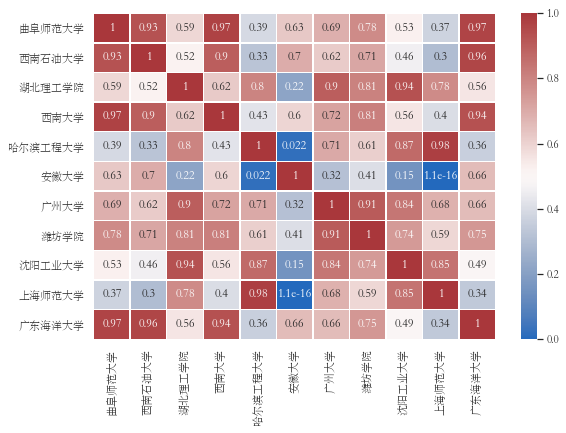

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
sns.set(font='STSong')  # 解决中文字体显示
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(schoolDisDF, annot=True, linewidths=.5, ax=ax, cmap="vlag")